## Assignment 5

# Question 2

a)
    i)More Flexible, Has more prediction accuracy when the bias is increased and that increase is less than the decrease in variance
    ii)More Flexible, has more prediciton accuracy when the variance is increased and that increase is less than the decrease in bias
    iii)Less Flexible, has more prediction accuracy when the increase in bias is less than the decrease in varaince
    iv)Less flexible, has more prediction accuracy when the increase in variance is less than the decrease in bias

b)
   i)More Flexible, Has more prediction accuracy when the bias is increased and that increase is less than the decrease in variance
    ii)More Flexible, has more prediciton accuracy when the variance is increased and that increase is less than the decrease in bias
    iii)Less Flexible, has more prediction accuracy when the increase in bias is less than the decrease in varaince
    iv)Less flexible, has more prediction accuracy when the increase in variance is less than the decrease in bias
    
c)
    i)More Flexible, Has more prediction accuracy when the bias is increased and that increase is less than the decrease in variance
    ii)More Flexible, has more prediciton accuracy when the variance is increased and that increase is less than the decrease in bias
    iii)Less Flexible, has more prediction accuracy when the increase in bias is less than the decrease in varaince
    iv)Less flexible, has more prediction accuracy when the increase in variance is less than the decrease in bias

# Question 9

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.model_selection as skm
import sklearn.linear_model as skl

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/Users/rj/Downloads/College.csv')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [46]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

In [47]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df.drop(columns=non_numeric_columns, inplace=True)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [57]:
X = df.drop(columns=['Apps'])
y = df['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
mean_squared_error(y_test, linear_test_predictions)


1492443.3790390508

### Ridge

In [97]:
ridge_cv_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv_model.fit(X_train, y_train)
ridge_best_alpha = ridge_cv_model.alpha_
ridge_model = Ridge(alpha=ridge_best_alpha)
ridge_model.fit(X_train, y_train)
ridge_test_predictions = ridge_model.predict(X_test)
mean_squared_error(y_test, ridge_test_predictions)


1478572.8112796955

### Lasso

In [61]:
lasso_cv_model = LassoCV()
lasso_cv_model.fit(X_train, y_train)
lasso_best_alpha = lasso_cv_model.alpha_
lasso_model = Lasso(alpha=lasso_best_alpha)
lasso_model.fit(X_train, y_train)
lasso_test_predictions = lasso_model.predict(X_test)
lasso_test_error = mean_squared_error(y_test, lasso_test_predictions)
lasso_non_zero_coefficients = np.sum(lasso_model.coef_ != 0)
print("Test Error (Lasso Regression):", lasso_test_error)
print("Number of Non-Zero Coefficients (Lasso Regression):", lasso_non_zero_coefficients)

Test Error (Lasso Regression): 1587020.0176529188
Number of Non-Zero Coefficients (Lasso Regression): 7


 The worst one was definetly Lasso because it had the high error

## Question 11

In [64]:
boston = pd.read_csv('/Users/rj/Downloads/Boston.csv', sep=',')
boston1 = boston.drop(columns = 'Unnamed: 0')
boston1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

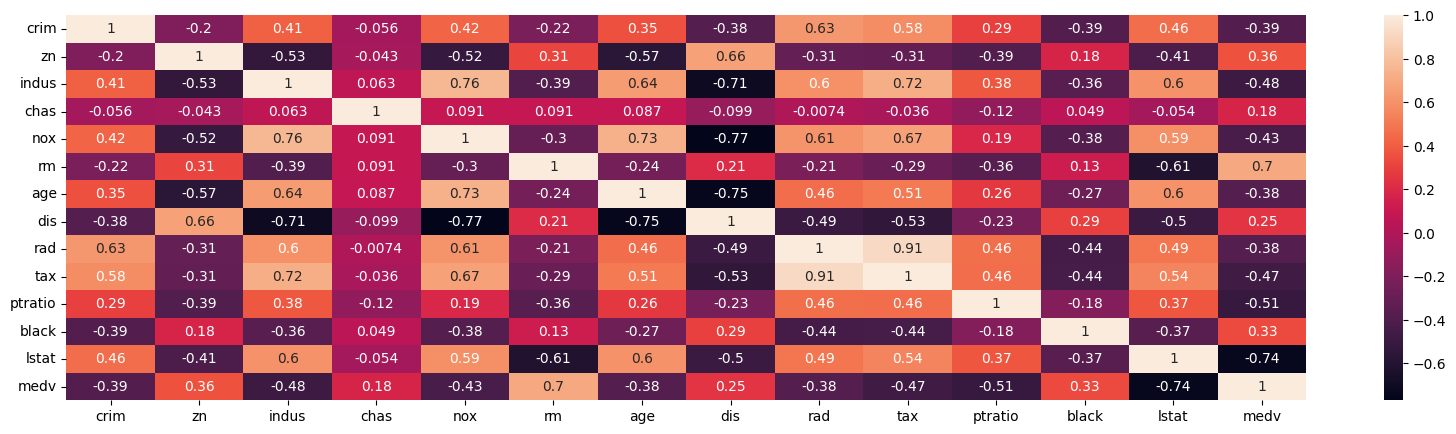

In [67]:
plt.figure(figsize = (20, 5))
sns.heatmap(boston1.corr(), annot = True)

In [69]:
y = boston1['medv']
X = sm.add_constant(boston1.loc[:, boston1.columns.drop('medv')])

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_v

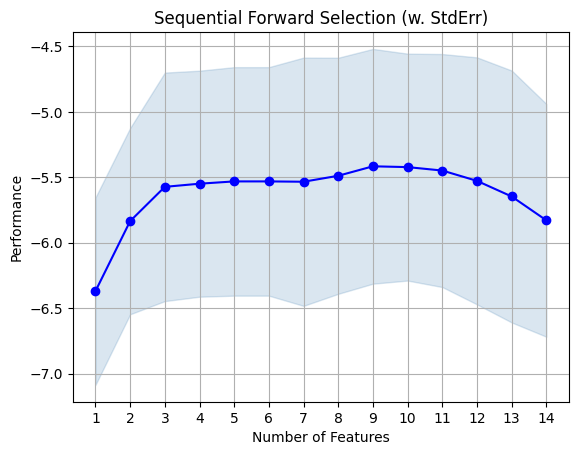

In [70]:
c = LinearRegression()

sfs = SequentialFeatureSelector(c, 
          k_features=14, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [71]:
print('Best RMSE: %.2f' % -sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

Best RMSE: 5.83
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Best subset (corresponding names): ('const', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat')


In [72]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values("avg_score", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 3, 4, 6, 8, 11, 12, 13)","[-3.14947510499568, -5.1568747363932665, -5.47...",-5.416092,"(const, crim, indus, chas, rm, dis, ptratio, b...",2.303321,1.792062,0.896031
10,"(0, 1, 2, 3, 4, 6, 8, 11, 12, 13)","[-3.301099150212398, -5.073438740441281, -5.49...",-5.422267,"(const, crim, zn, indus, chas, rm, dis, ptrati...",2.226405,1.732218,0.866109
11,"(0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13)","[-3.520075028725295, -4.706731889057112, -5.77...",-5.448534,"(const, crim, zn, indus, chas, nox, rm, dis, p...",2.286196,1.778738,0.889369
8,"(0, 1, 4, 6, 8, 11, 12, 13)","[-3.079904974735659, -5.344708741760809, -5.59...",-5.48843,"(const, crim, chas, rm, dis, ptratio, black, l...",2.316288,1.802151,0.901075
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13)","[-3.5556891557166805, -4.708254987199378, -5.8...",-5.527333,"(const, crim, zn, indus, chas, nox, rm, age, d...",2.423409,1.885495,0.942747
6,"(0, 1, 4, 6, 11, 13)","[-2.9846400595790303, -5.297968281405689, -5.9...",-5.531412,"(const, crim, chas, rm, ptratio, lstat)",2.241978,1.744335,0.872168
5,"(1, 4, 6, 11, 13)","[-2.984640059579034, -5.297968281405687, -5.98...",-5.531412,"(crim, chas, rm, ptratio, lstat)",2.241978,1.744335,0.872168
7,"(0, 1, 4, 6, 11, 12, 13)","[-3.0240188730301463, -5.1180479012400335, -5....",-5.533946,"(const, crim, chas, rm, ptratio, black, lstat)",2.435677,1.895039,0.94752
4,"(4, 6, 11, 13)","[-2.9767037621862333, -5.352589806162711, -5.9...",-5.548986,"(chas, rm, ptratio, lstat)",2.21758,1.725352,0.862676
3,"(6, 11, 13)","[-3.070851485143958, -5.094948040893531, -6.01...",-5.572917,"(rm, ptratio, lstat)",2.241967,1.744327,0.872163


In [73]:
X_tran=X.iloc[:, [0, 1, 3, 4, 6, 8, 11, 12, 13]]

#X_trans=sfs.transform(X)

scores_regr = cross_val_score(c, X_tran, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_regr.mean()

5.416091749299496

In [74]:
sfs = SequentialFeatureSelector(c, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=5,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=6):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_v


Sequential Forward Selection (k=6):
(0, 1, 4, 6, 11, 13)
CV Score:
-5.531412047723801


/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_v

# Ridge

In [96]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_root_mean_squared_error')
ridgecv.fit(X, y)
#ridgecv.alpha_
mean_squared_error(y, ridgecv.predict(X))

21.89531345736728

In [76]:
ridgecv.best_score_

-4.870850161658817

In [88]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

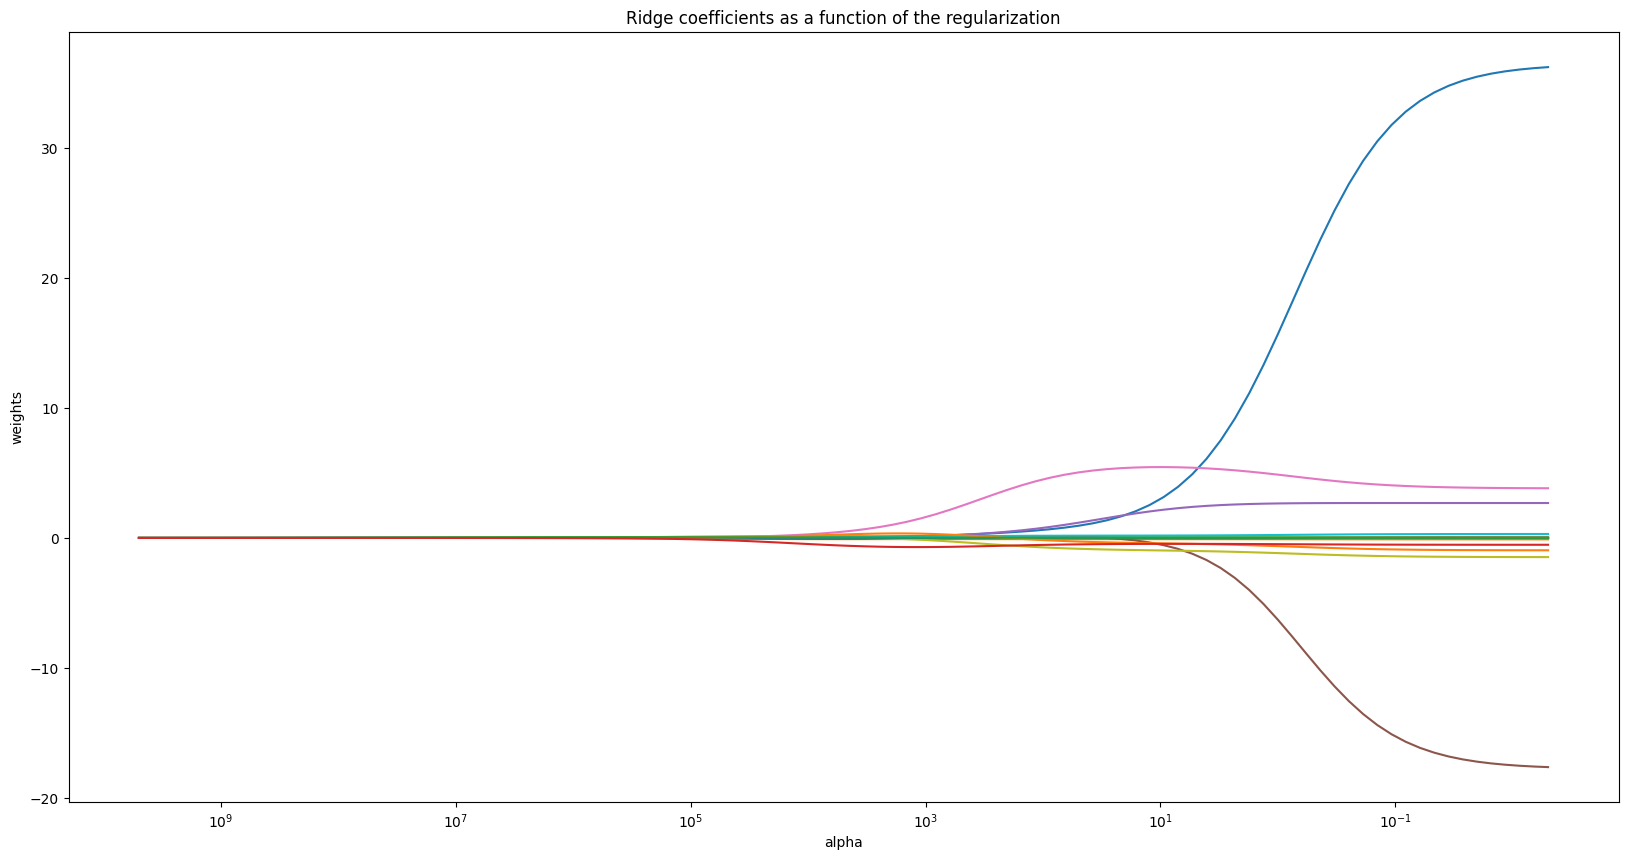

In [89]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# Lasso

In [94]:
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], 
                   cv = 5, 
                   max_iter = 100000,  
                   random_state=1).fit(X, y)
lasso_cv.alpha_
#lasso_cv.set_params(alpha=lasso_cv.alpha_)
lasso_cv.fit(X, y)
mean_squared_error(y, lasso_cv.predict(X))

23.047932913211717

In [87]:
cross_val_score(lasso_cv, X, y,scoring='neg_root_mean_squared_error',cv=5).mean()

-6.067864388519938

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.697e+03, tolerance: 2.996e+01
  model = cd_fast.enet_coordinate_descent(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.712e+03, tolerance: 2.996e+01
  model = cd_fast.enet_coordinate_descent(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

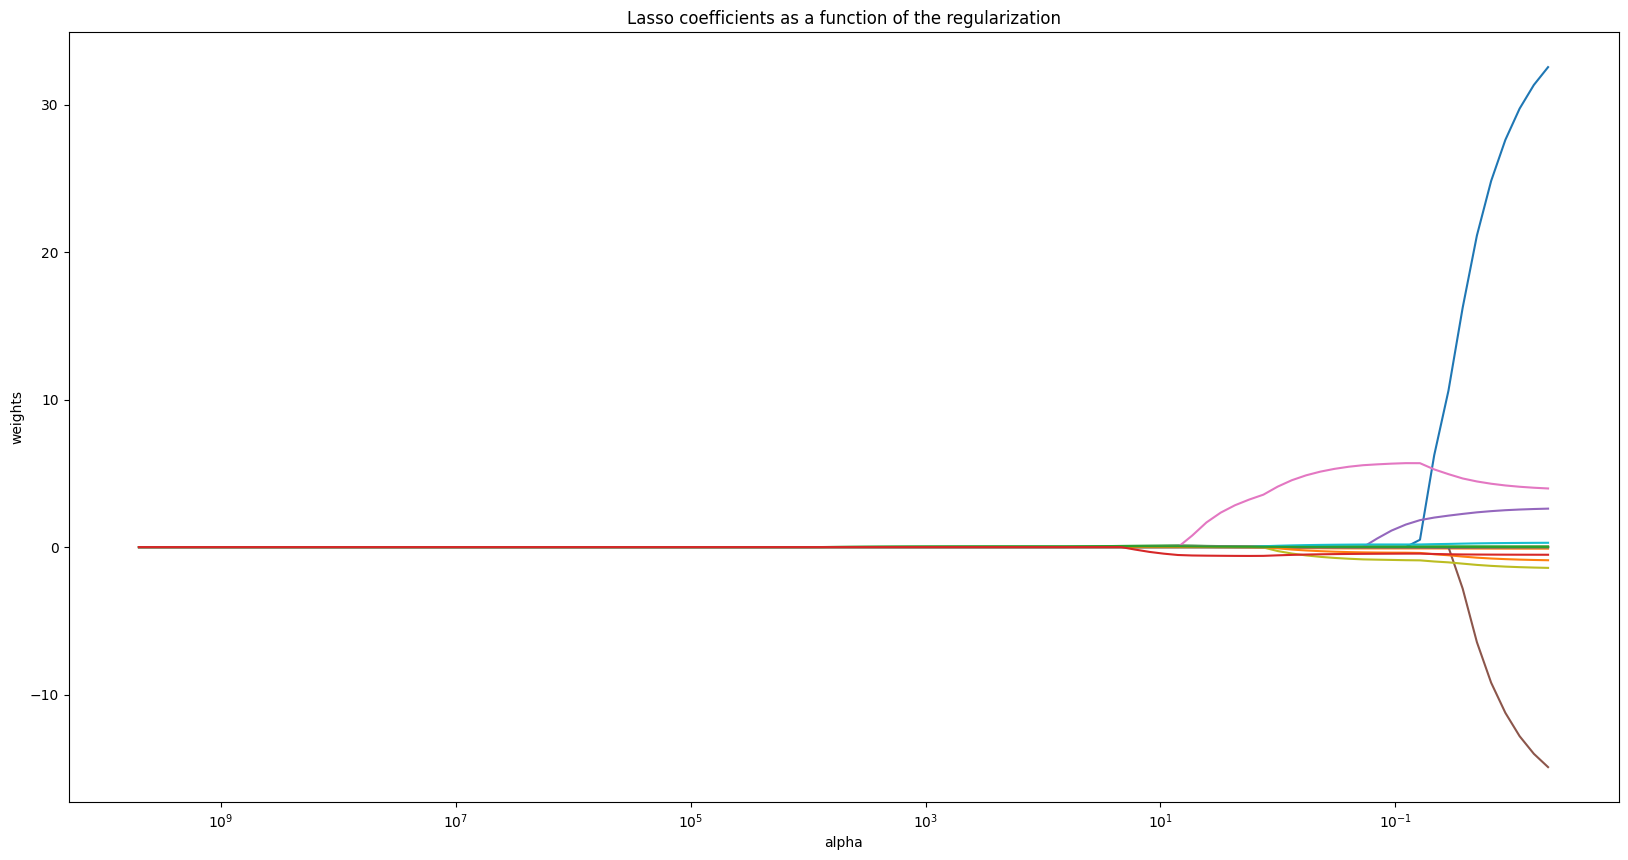

In [90]:
coefs = []
for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Set the figure size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# PCR

In [95]:
pca = PCA(n_components=5)
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('linear_regression', LinearRegression())])
pca_pipeline.fit(X, y)
mean_squared_error(y, pca_pipeline.predict(X))


25.5808626899439

# RidgeCV was the best

I think the best model to use would be a linear regression model. A linear model would be good because we have continuous linear predictors which would fit well in a linear regression model. While Ridge regression was still good the error was too high for my liking.

My model does not include all the features. It has 9 of 13 features which is pretty good because we are making use of the majority of predictors for our models but it does not include all of 13 predictors.